In [2]:
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn import metrics

In [3]:
df = data('bioChemists')
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


In [5]:
dummy = pd.get_dummies(df['fem'])
df = pd.concat([df,dummy],axis=1)
dummy = pd.get_dummies(df['mar'])
df = pd.concat([df,dummy],axis=1)
df.head()

,art,fem,mar,kid5,phd,ment,Men,Women,Married,Single
1,0,Men,Married,0,2.52,7,True,False,True,False
2,0,Women,Single,0,2.05,6,False,True,False,True
3,0,Women,Single,0,3.75,6,False,True,False,True
4,0,Men,Married,1,1.18,3,True,False,True,False
5,0,Women,Single,0,3.75,26,False,True,False,True


In [6]:
X = df[['Men', 'kid5','phd','ment','art']]
y = df['Married']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=41)

In [8]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [9]:
clf.score(X_train,y_train)

0.7377049180327869

In [10]:
y_pred = clf.predict(X_test)

In [11]:
y_pred

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,

In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.49      0.55      0.52        62
        True       0.75      0.70      0.73       121

    accuracy                           0.65       183
   macro avg       0.62      0.63      0.62       183
weighted avg       0.66      0.65      0.65       183



In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[34, 28],
       [36, 85]])

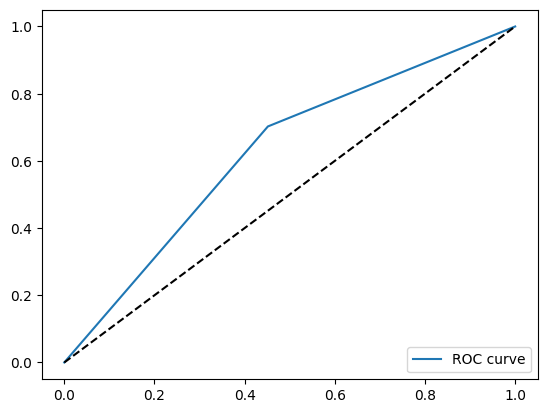

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC curve")
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')

Black line : It is a worst case. It is a straight line indicating that the model is not doing the better job beyond guessing
As it curves towards upward (Blue line) the model is discriminanting better and classifying properly